# Supervised learning algorithm for both classification and regression. [Bagging technique]

### Ensemble Learning: 

#### An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an Ensemble model.

### 2 types of Ensemble learning:
####  a) Boosting (group of algorithms improving the learning)
####  b) Bootstrap Aggregating aka Bagging (random sampling with replacement to reduce variance. runs each model independently and aggregates outputs at the end without preference to any model)

##  The problem with Decision Trees/Why we need Random Forest?

Decision trees are sensitive to the specific data on which they are trained.

If the training data is changed the resulting decision tree can be quite different and in turn the predictions can be quite different.

Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.

![title](randomforest.png)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("Position_Salaries.csv")
file

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
x = file.iloc[:,1:2].values
y = file.iloc[:,2].values

In [24]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

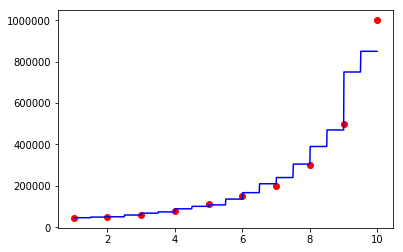

In [25]:
x_grid = np.arange(min(file["Level"]),max(file["Level"]), 0.01) #breaking down x scale by 0.01
x_grid = x_grid.reshape((len(x_grid), 1)) #reshaping to get a matrix
plt.scatter(file[["Level"]],file["Salary"], c="red")
plt.plot(x_grid,regressor.predict(x_grid), color="blue")
plt.show()

#### We have more steps as we had more decision trees (10) compared to applying decision tree regressor 

#### Adding more trees may not give a different prediction as the average would start convering